In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
# Kmeans on Covid Data set 
Covid = pd.read_csv("cleaned_twitter_dataset.csv")
Covid.dropna(inplace=True)
Covid_kMeans = Covid.copy()
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [3]:
Covid_str_columns = ['Retweet_count','Sentiment Score']

#convert the string columns from numeric
from sklearn import preprocessing
for i in Covid_str_columns:
    number = preprocessing.LabelEncoder()
    Covid[i] = number.fit_transform(Covid[i].astype(str))

KeyError: 'Sentiment Score'

In [ ]:
Covid_Analyis = Covid[['Retweet_count','Sentiment Score']]
df_norm = norm_func(Covid_Analyis)

In [4]:
###### screw plot or elbow curve ############
k = list(range(2,25))
k
wcss = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans= KMeans(i)
    kmeans.fit(df_norm)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

NameError: name 'df_norm' is not defined

In [5]:
###### screw plot or elbow curve ############
k = list(range(2,25))
k
wcss = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans= KMeans(i)
    kmeans.fit(df_norm)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

NameError: name 'df_norm' is not defined

In [6]:
# Selecting 6 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=6) 
model.fit(df_norm)

NameError: name 'df_norm' is not defined

In [8]:
identified_clusters = model.fit_predict(df_norm)

In [9]:
#data_with_clusters
Covid_kMeans['Cluster'] = identified_clusters
Covid_kMeans.head()

,Tweet_date,Tweet_time,Tweet_City,Tweet_Country,Tweet_account,Retweet_count,Tweet_Text,Sentiment Score,Polarity,Cluster
2,4/1/2020,0:45:00,Basel,Switzerland,Novartis News,31.0,face global crisis novartis mobilized ramp cap...,0.0,neutral,1
3,4/1/2020,0:46:00,Basel,Switzerland,Novartis News,2.0,information response visit,0.0,neutral,4
4,4/1/2020,0:59:00,Basel,Switzerland,Novartis News,4.0,clinical investigation assessing portfolio exi...,0.5,positive,3
5,4/1/2020,0:59:00,Basel,Switzerland,Novartis News,3.0,ramp response leveraging capability discovery ...,0.0,neutral,1
6,4/1/2020,1:00:00,Basel,Switzerland,Novartis News,3.0,community fund response fund provide million s...,0.0,neutral,1


In [10]:
country_df = Covid_kMeans[(Covid_kMeans['Tweet_Country'] == 'USA') | (Covid_kMeans['Tweet_Country'] == 'UAE') |(Covid_kMeans['Tweet_Country'] == 'Switzerland')|(Covid_kMeans['Tweet_Country'] == 'UK')|(Covid_kMeans['Tweet_Country'] == 'India')|(Covid_kMeans['Tweet_Country'] == 'Canada')|(Covid_kMeans['Tweet_Country'] == 'Australia')|(Covid_kMeans['Tweet_Country'] == 'Nigeria')|(Covid_kMeans['Tweet_Country'] == 'Singapore')|(Covid_kMeans['Tweet_Country'] == 'Pakistan')]
country_df['Tweet_Country'].value_counts().head(10)

USA            3375
UAE            1999
Switzerland     860
UK              553
India           412
Canada          347
Australia       105
Nigeria         104
Singapore       103
Pakistan         91
Name: Tweet_Country, dtype: int64

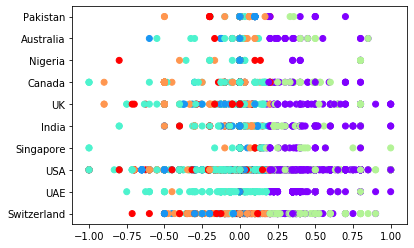

In [11]:
plt.scatter(country_df['Sentiment Score'],country_df['Tweet_Country'],c=country_df['Cluster'], cmap = 'rainbow')
#plt.xlim(-1,10)
#plt.ylim(-1, 10)
plt.show()

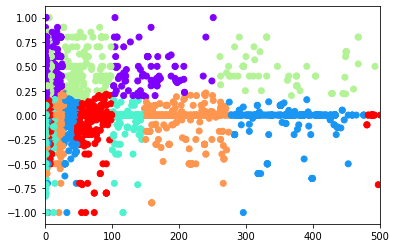

In [12]:
#retweet counts vs sentiment score
plt.scatter(Covid_kMeans['Retweet_count'], Covid_kMeans['Sentiment Score'], c=Covid_kMeans['Cluster'], cmap = 'rainbow')
plt.xlim(-1,500)
#plt.ylim(-1, 10)
plt.show()

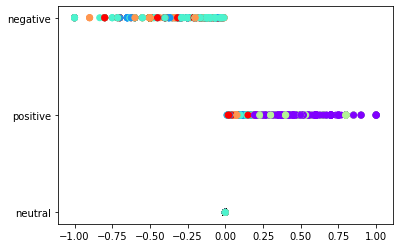

In [13]:
#sentiment score vs polarity
plt.scatter(Covid_kMeans['Sentiment Score'],Covid_kMeans['Polarity'],c=Covid_kMeans['Cluster'],cmap='rainbow')

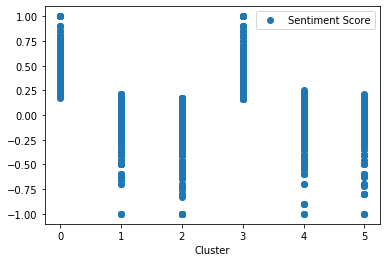

In [14]:
#Clusters vs Sentiment Score  
Covid_kMeans.plot(x='Cluster',y='Sentiment Score',style=['o','rx'])